In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from matplotlib import font_manager, rc
from scipy.stats import norm

## Exploring Patterns & Insights from Tokyo Rentals
> In this section, we perform **exploratory data analysis (EDA)** to uncover patterns, relationships, and potential drivers of rental prices. The analysis evaluates a range of features including area, building age, building size, floor plan, and station proximity to **better understand how different factors influence pricing**.

In [2]:
# Load Tokyo housing metrics table to DataFrame
tokyo_housing_df = pd.read_csv('tokyo_housing.csv')

### Correlation Analysis of Housing Features
>To identify relationships between numeric features, we computed a **correlation matrix** and visualized it with a **heatmap**. This helps highlight **which variables are strongly associated with each other** and may influence rent.

In [ ]:
# Compute correlation matrix for all numeric features
housing_corr = tokyo_housing_df.select_dtypes(['int64', 'float64']).corr()

# Initialize figure
fig = plt.figure(figsize = (15, 8))

# Plot heatmap of correlations
sns.heatmap(
    data = housing_corr, cmap = 'vlag', annot = True, linecolor = 'black', 
    linewidths = 0.5, fmt = '.2f', cbar_kws = {'label': 'Correlation Coefficient'}
)

# Set figure title
fig.suptitle('Correlation Heatmap of Housing Metrics', fontweight = 'bold', fontsize = 18)

plt.tight_layout()
plt.savefig('correlation.png')

>Since there are many features and corresponding correlation coefficients, we won’t discuss each individually. For this analysis, we focus on the features most relevant to our objectives. In particular, **we are only concerned with the relationships between** `rent` **and other features**.
>- `management_fee`, `deposit`, `key_money`: As expected, these features show **strong correlations with** `rent`. It is also reasonable to assume that there exists **strong multicolinearty** among them. Therefore, we **will not explore these features** further in relation to `rent`.
>- `floor`, `building_age`, `building_size`: These features show **moderate correlations with** `rent`. Specifically, `floor` and `building_size` are positively correlated with `rent`, while `building_age` is negatively correlated. In other words, **larger buildings and units on higher floors tend to be more expensive**, whereas **older buildings generally have lower rents**.
>- `area`: This feature exhibits the **strongest correlation with** `rent` **among all variables**. In other words, the **size** of a housing unit is the **most influential factor in determining its rental price**.
>- `distance_to_nearest_station`, `avg_distance_to_stations`: These features show **little to no correlation with** `rent`. This finding is somewhat surprising given a prior assumption that proximity to nearby stations would influence pricing.

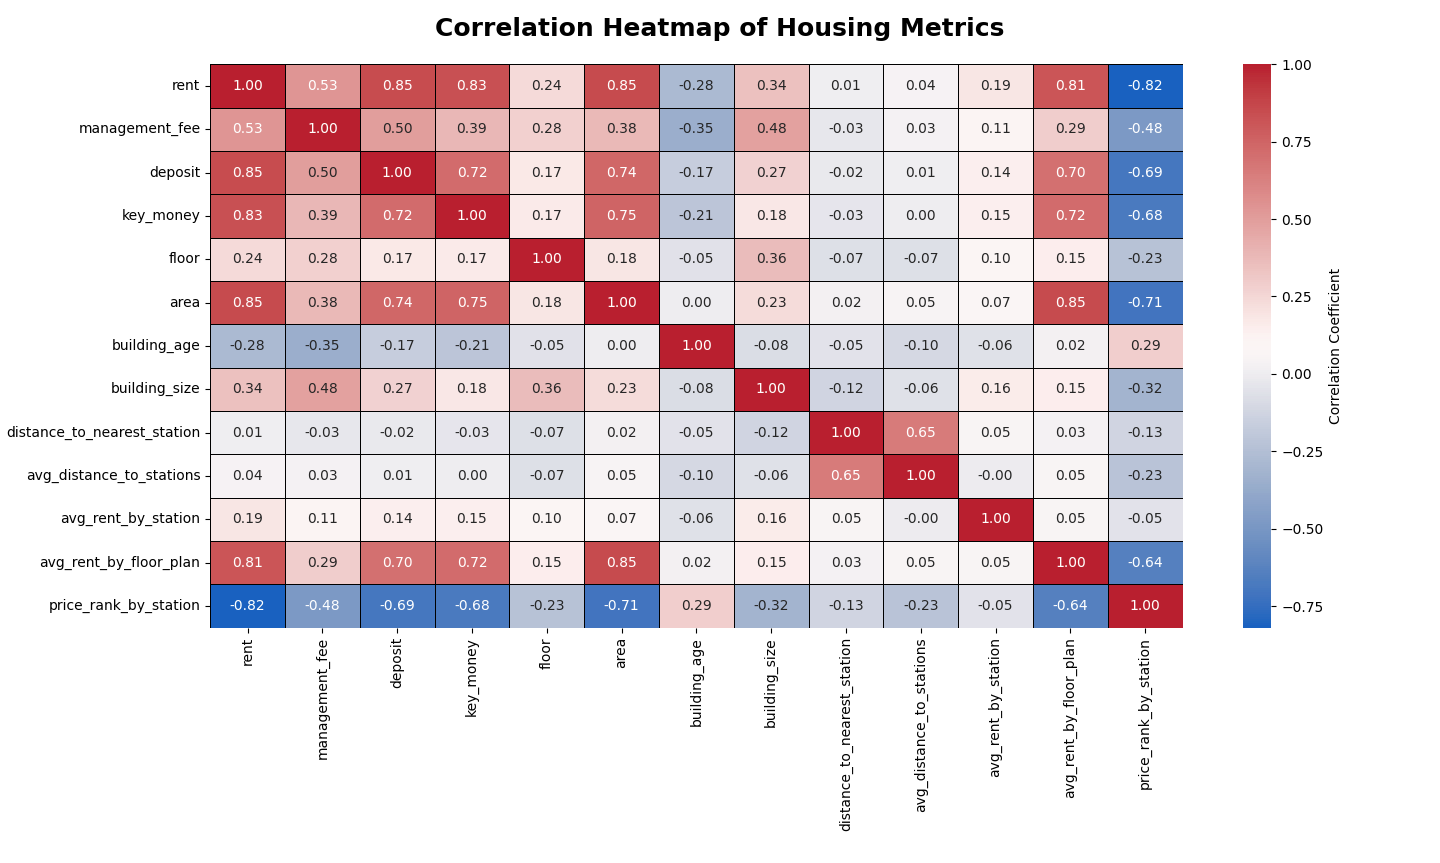

### Distribution of Rental Prices
> The following plot visualizes the **overall distribution of rental prices** across the dataset.
A **kernel density estimate (KDE)** curve is overlaid on the histogram to highlight the shape of the distribution, and the dashed line marks the **mean rental price**.

In [ ]:
# Set grid style 
sns.set_style("whitegrid")

# Set color palette 
palette = sns.color_palette("muted")

In [ ]:
# Compute the average rental price
mean_rent = tokyo_housing_df['rent'].mean()

# Initialize the figure 
fig = plt.figure(figsize = (15, 8))

# Plot histogram of rent values (normalized to density)
sns.histplot(data = tokyo_housing_df, x = 'rent', color = palette[0], stat = 'density', alpha = 0.4)

# Overlay KDE curve to show the smoothed rent distribution
sns.kdeplot(data = tokyo_housing_df, x = 'rent', color = palette[3], fill = True, linewidth = 1.5)

# Add a vertical line to indicate the mean rent
plt.axvline(x = mean_rent, color = 'black', linestyle = '--', label = 'Mean Rental Price')
plt.annotate(f'Mean Rent = ¥{mean_rent:.2f}', xy = (mean_rent, 0.00001), xytext = (mean_rent + 15000, 0.00001), arrowprops = dict(facecolor = 'black', shrink = 0.05), fontweight = 'bold')

# Set title and axis labels
plt.title('Distribution of Rental Prices', fontsize = 18, fontweight = 'bold')
plt.xlabel('Rent', fontsize = 12)
plt.ylabel('Density', fontsize = 12)

plt.savefig('rent_dist.png')

> **Distribution of Rental Prices**
>- The figure displays a **right-skewed distribution** of rental prices, indicating that **most rents are below the mean**. The mean is higher than the median, as it is pulled toward the upper end of the distribution by a small number of very expensive listings.
>- The **mean rental price is approximately ¥101427**. 

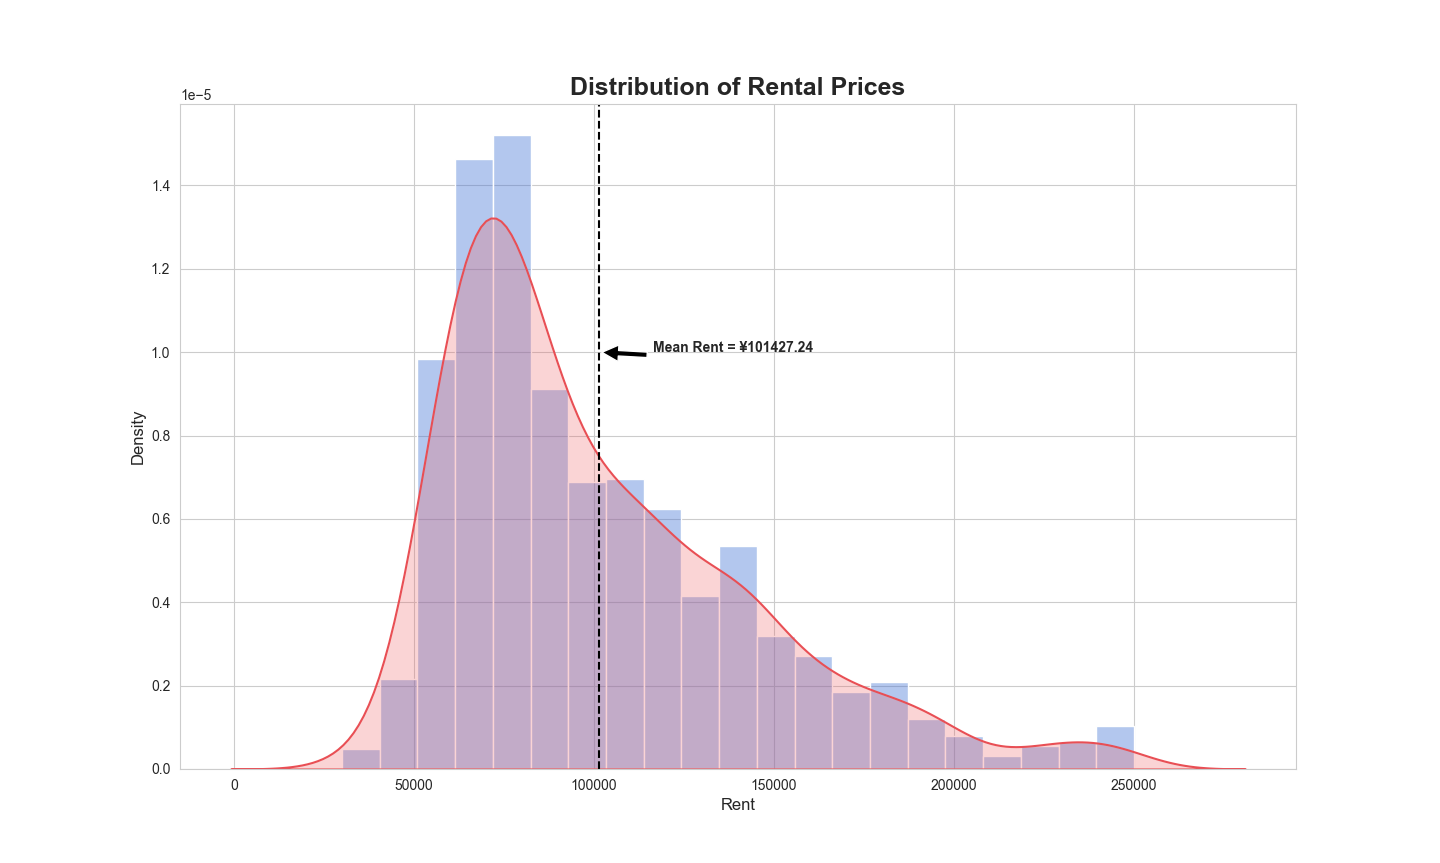

### Average Rent: Confidence Interval Analysis
>We calculate a **95% confidence interval for the mean rental price** in the Nakai area.
>- **Confidence level**: 95%
>- **Significance level**: α = 0.05
>
>The confidence interval provides a range in which we are 95% confident that the true mean rent lies.

In [3]:
# Confidence level -- 95%
# Significance level -- alpha = 0.05
alpha = 0.05

# Extract rent values as the sample
rent_values = tokyo_housing_df['rent']

# Compute the sample mean
sample_mean = np.mean(rent_values)

# Compute the sample size
sample_size = len(rent_values)
print(f'The sample size is {sample_size}')

The sample size is 1193


>- Typically, when the population standard deviation is unknown, we use the **Student's t-distribution**. However, as the sample size *n* grows, the degrees of freedom increase and the **t-distribution approaches the normal (Gaussian) distribution**. With a **large sample size** of around 1,200, the **t-distribution is effectively Gaussian**, allowing us to use the **z critical value**. For a significance level of *α* = 0.05, the corresponding z critical value is 1.96.
>- The resulting **confidence interval is ¥101427.242 &plusmn; 2409.882**. In other words, we are 95% confident that the true mean rent falls within this range. 

In [4]:
# Compute the standard error of the mean
standard_error = np.std(rent_values)/np.sqrt(sample_size)

# Compute the critical z-value for a two-tailed test
z_critical = norm.ppf(1 - (alpha/2))

# Compute the margin of error
margin_of_error = z_critical*standard_error

# Report the 95% confidence interval
print(f'The 95% confidence interval is {sample_mean:.3f} +/- {margin_of_error:.3f}')

The 95% confidence interval is 101427.242 +/- 2409.882


### Correlation Between Rent & Floor Area
> As noted earlier, `area` exhibits the strongest correlation with `rent`. In this section, we explore the relationship between `rent` and `area` using a **scatter plot** and compute the **Pearson correlation coefficient** to quantify the strength and direction of the linear relationship. **For the following analyses, the predetermined level of significance (*α*) is 0.05**.

In [ ]:
# Pearson correlation between rent and area
pearson_coeff, p_value = stats.pearsonr(x = tokyo_housing_df['area'], y = tokyo_housing_df['rent'])

# Initialize fig, ax
fig, ax = plt.subplots(figsize = (15, 8))

# Scatter plot of rent vs. area with pearson coefficient & p-value
plt.scatter(tokyo_housing_df['area'], tokyo_housing_df['rent'], color = palette[0])
plt.text(
    0.10, 0.95, f'Rent & Area:\npearson_coeff = {pearson_coeff}\np_value = {p_value}', 
    transform = ax.transAxes, verticalalignment = 'top', fontweight = 'bold'
)

# Set title, axis labels
plt.title('Correlation of Rent with Floor Area', fontsize = 18, fontweight = 'bold')
plt.xlabel('Area (m^2)', fontsize = 12)
plt.ylabel('Rent (¥)', fontsize = 12)

plt.savefig('rent_vs_area.png')

>**Correlation of Rent with Floor Area**
>
>- The scatter plot and Pearson correlation coefficient indicate a **strong positive relationship** between `rent` and `area`.
>- The **p-value is extremely small** (effectively zero), suggesting that the likelihood of this relationship occurring by chance is negligible. Therefore, **we can confidently reject the null hypothesis** of no correlation.
>- It’s worth noting that there is a slight presence of **heteroskedasticity** in the scatter plot. While this could potentially affect future modeling, it appears minor and will not be addressed in the current analysis.

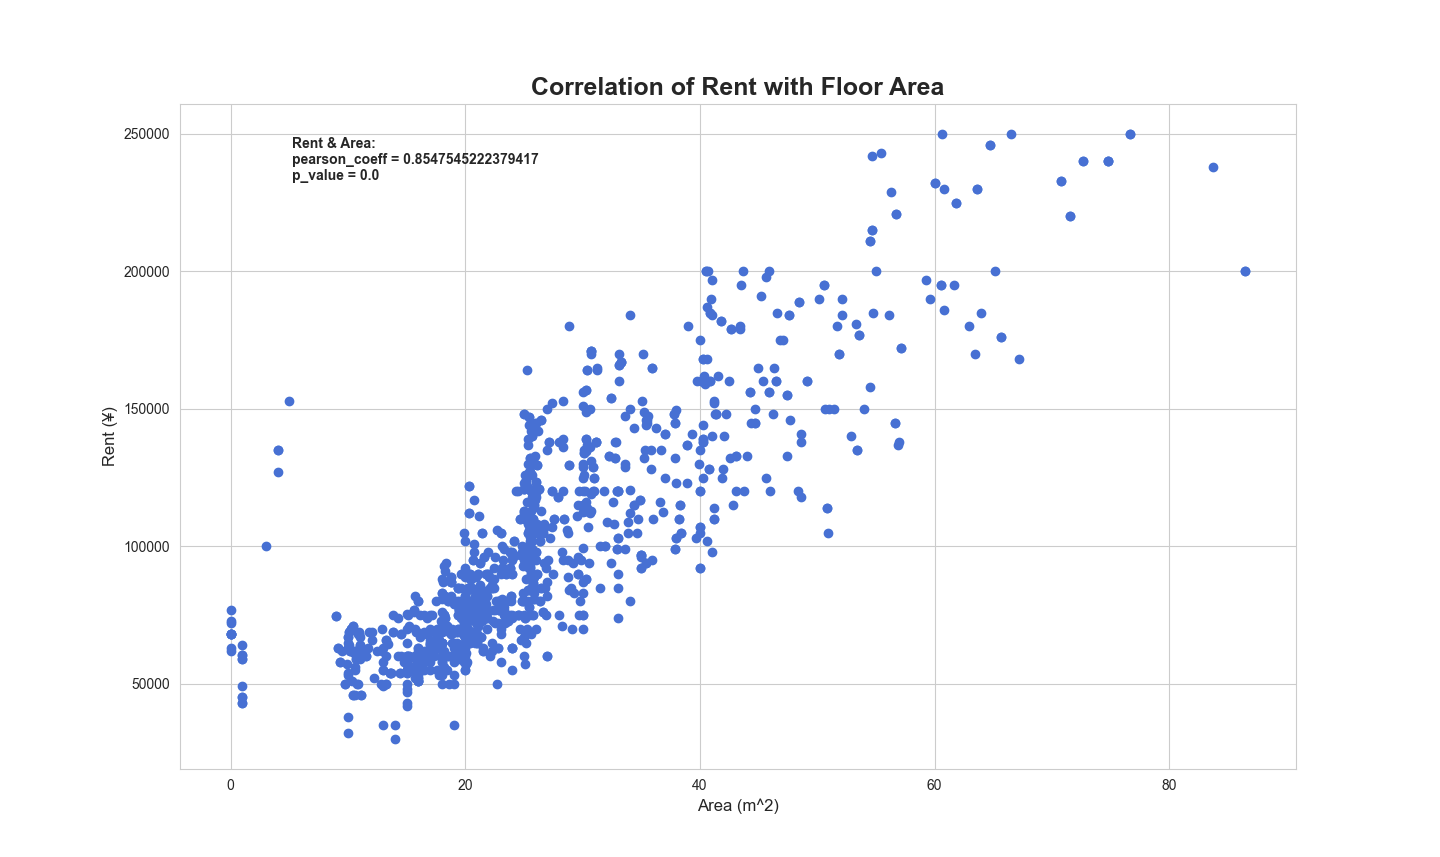

### Correlation Between Rent & Building Age
>In this section, we examine the relationship between `rent` and `building_age`, a **quantitative discrete variable**. Typically, features with a small number of unordered discrete values are best visualized using a **box plot**. However, since `building_age` has a **clear order and many distinct values**, a **scatter plot** is more appropriate for visualization. We also calculate the **Pearson correlation coefficient** to quantify the relationship between `rent` and `building_age`.

In [ ]:
# Pearson correlation between rent and area
pearson_coeff, p_value = stats.pearsonr(x = tokyo_housing_df['building_age'], y = tokyo_housing_df['rent'])

# Initialize fig, ax
fig, ax = plt.subplots(figsize = (15, 8))

# Scatter plot of rent vs. area with pearson coefficient & p-value
plt.scatter(tokyo_housing_df['building_age'], tokyo_housing_df['rent'], color = palette[1])
plt.text(
    0.70, 0.95, f'Rent & Building Age:\npearson_coeff = {pearson_coeff}\np_value = {p_value}', 
    transform = ax.transAxes, verticalalignment = 'top', fontweight = 'bold'
)

# Set title, axis labels
plt.title('Correlation of Rent with Building Age', fontsize = 18, fontweight = 'bold')
plt.xlabel('Age (Years)', fontsize = 12)
plt.ylabel('Rent (¥)', fontsize = 12)

plt.savefig('age_vs_area.png')

>**Correlation of Rent with Building Age**
>
>- The scatter plot and Pearson correlation coefficient indicate a **moderate negative relationship** between `rent` and `building_age`.
>- The **p-value is extremely small**, suggesting that the likelihood of this relationship occurring by chance is negligible. Therefore, **we can confidently reject the null hypothesis** of no correlation.
>- It’s worth noting that the **densest cluster** of points seems to **decrease rapidly at first and then level off**, indicating a **slight non-linear trend**. However, overall, the scatter plot and Pearson correlation coefficient still suggest an **approximately linear relationship**.

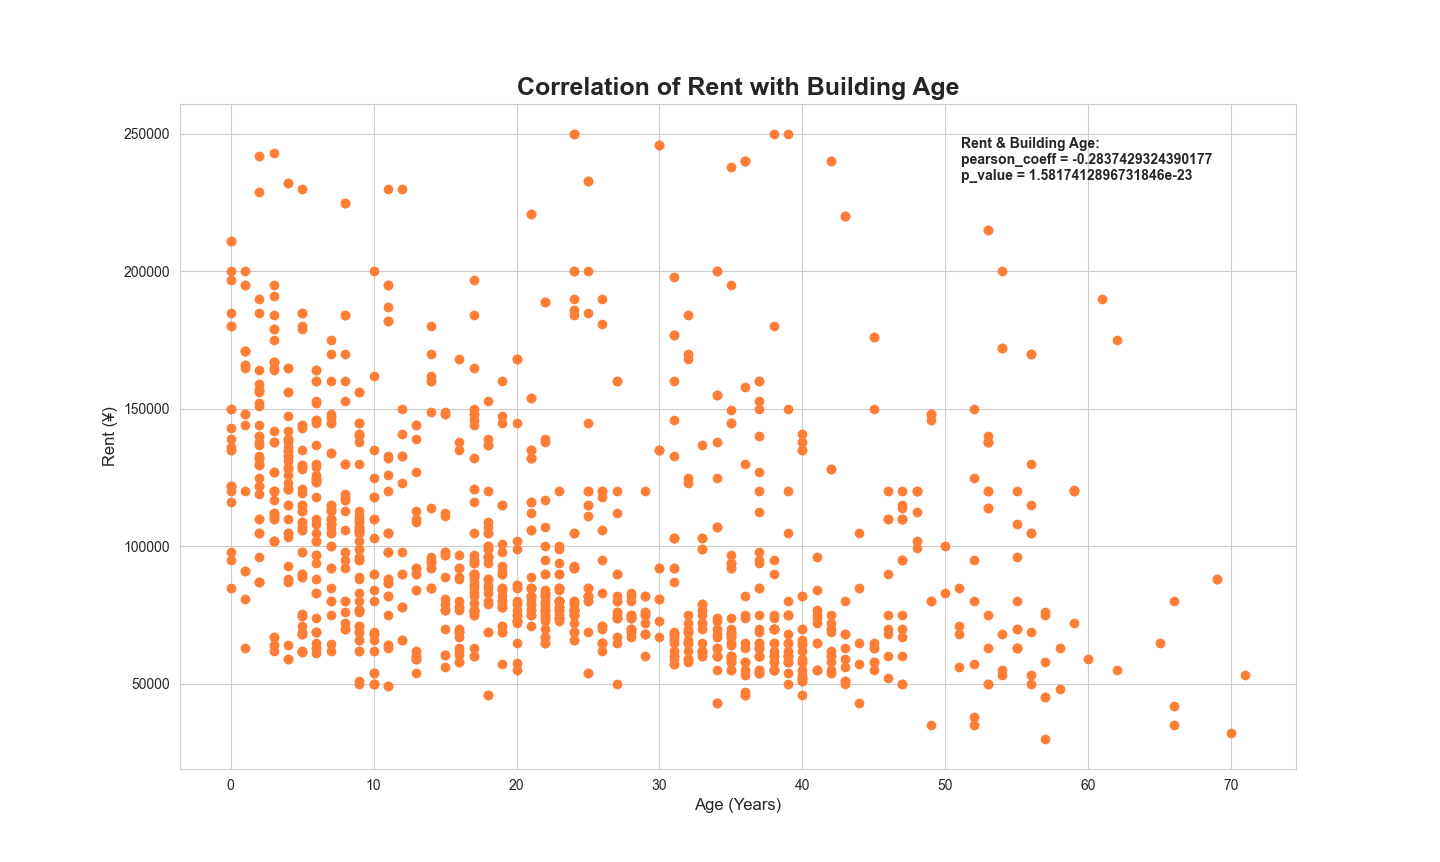

### Rent Distribution Across Floor Plans
>In this section, we explore the relationship between `rent` and `floor_plan`, a **qualitative (categorical) feature**. We use a **box plot** to visualize the different `floor_plan` categories and **corresponding price distributions**.

In [ ]:
# Initialize figure
fig = plt.figure(figsize = (15, 8))

# Boxplot distribution of rent by floor plan
sns.boxplot(
    data = tokyo_housing_df, x = 'floor_plan', y = 'rent', 
    palette = palette, flierprops = {'mfc' : 'black', 'marker': 'D'}
)

# Set title, axis labels
plt.title('Distribution of Rent by Floor Plan', fontsize = 18, fontweight = 'bold')
plt.xlabel('Floor Plan', fontsize = 12)
plt.ylabel('Rent (¥)', fontsize = 12)

plt.savefig('floor_plan_box.png')

>**Distribution of Rent by Floor Plan**
>- The box plot shows that **larger or more complex** `floor_plan` types generally correspond to **higher rent**.
>- The **numeric values** (e.g., `1LDK`, `2SDK`, `3DK`) represent the **number of rooms** in the unit. As expected, `rent` tends to **increase with the number of rooms**.
>- The **letters** in each category (e.g., "K" for Kitchen, "L" for Living room, etc.) indicate **additional features**. Units with **more of these features** typically command **higher rental prices**.

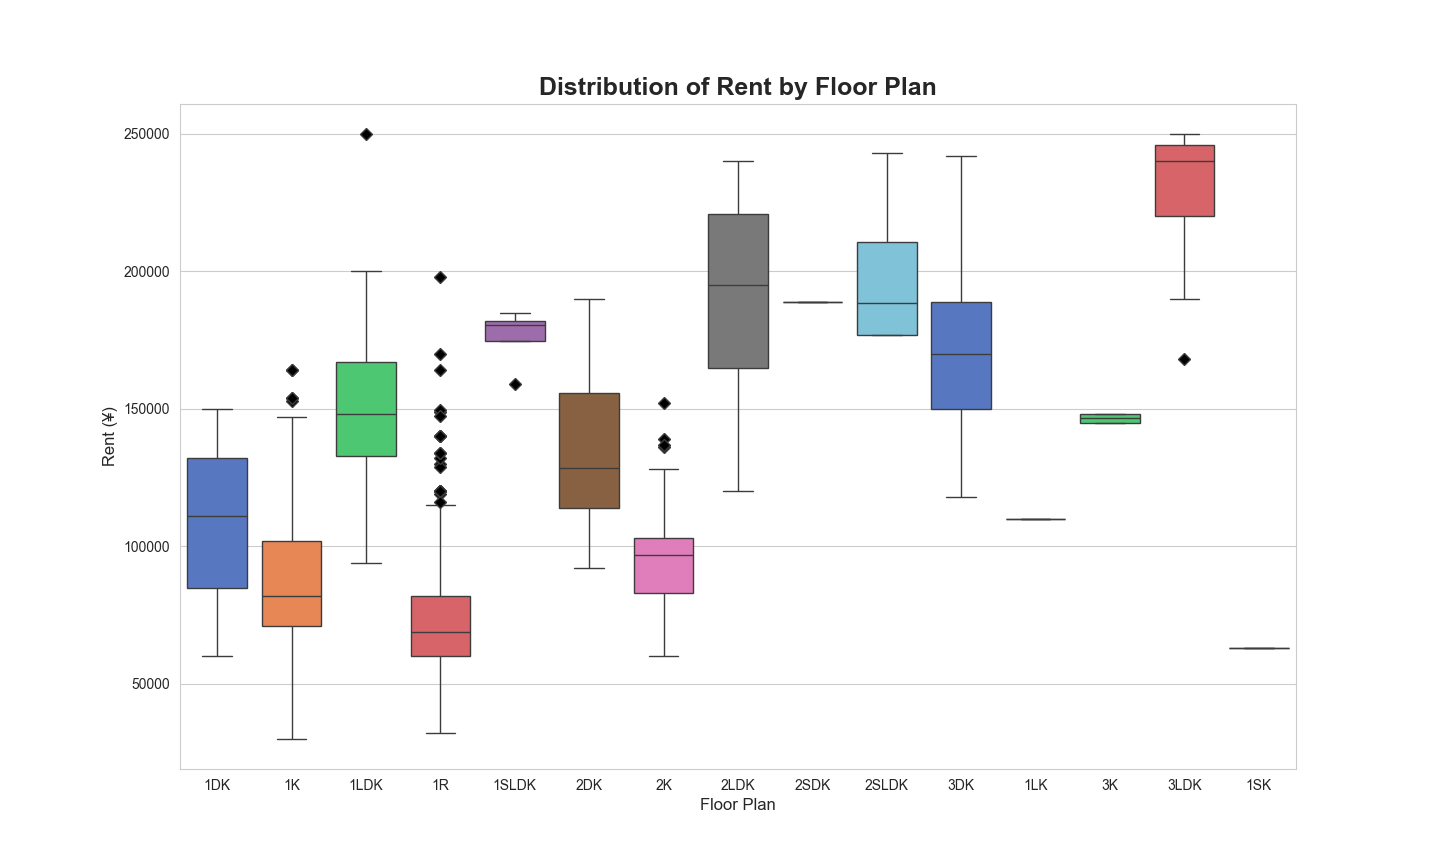

### Rent Variation with Station Proximity 
>In this section, we analyze **how proximity to the nearest station affects rental prices**. While **ordered quantitative variables** are often visualized with **scatter plots**, `distance_to_nearest_station` contains a relatively **small set of discrete values**. Therefore, a **box plot** is more appropriate here, as it clearly illustrates how rent distributions shift with increasing walking distance to the station.

In [ ]:
# Initialize figure
fig = plt.figure(figsize = (15, 8))

# Boxplot distribution of rent by distance to nearest station
sns.boxplot(
    data = tokyo_housing_df, x = 'distance_to_nearest_station', y = 'rent', 
    palette = palette, flierprops = {'mfc' : 'black', 'marker': 'D'}
)

# Set title, axis labels
plt.title('Distribution of Rent by Station Proximity', fontsize = 18, fontweight = 'bold')
plt.xlabel('Distance to Nearest Station (min)', fontsize = 12)
plt.ylabel('Rent (¥)', fontsize = 12)

plt.savefig('distance_box.png')

>**Distribution of Rent by Station Proximity**
>- The box plot shows **no clear relationship between** `distance_to_nearest_station` **and** `rent`.
>- This result is **somewhat unexpected**, as one might assume that **units closer to train stations are more desirable** and therefore **more expensive**.
>- Interestingly, the **highest rent values** appear among properties **farthest from the station**, contradicting the initial assumption.

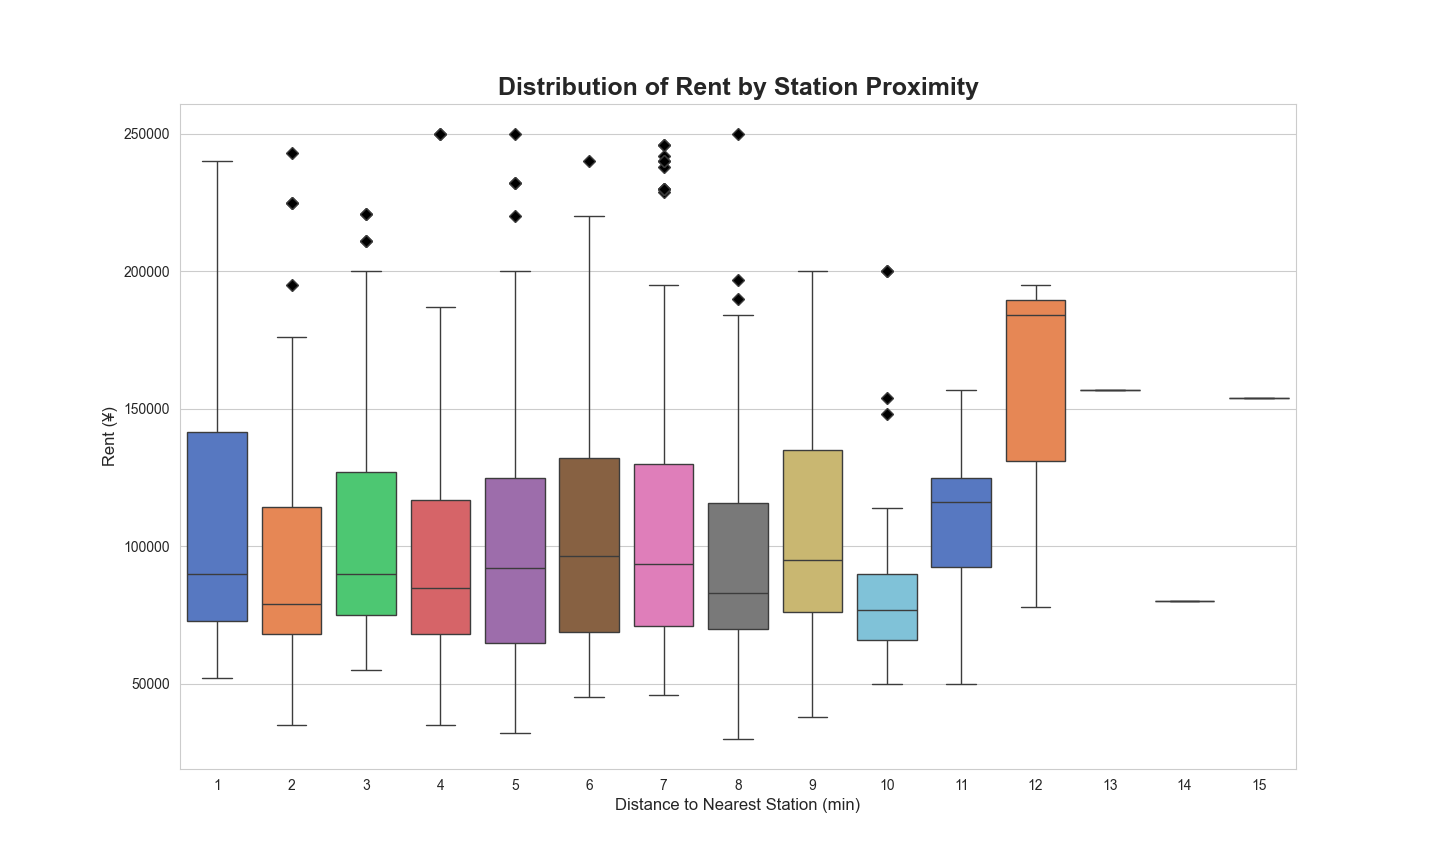

### Rent Distribution Across Stations
>In this section, we explore **how rental prices vary by station**. Since `nearest_station` is a **categorical variable**, a **box plot** is ideal for visualizing the **distribution of rent across different stations**. This allows us to identify patterns, outliers, and variations in `rent` depending on the nearest station.

In [ ]:
# Initialize figure
fig = plt.figure(figsize = (15, 8))

# Set a Japanese-capable font 
rc('font', family = 'Hiragino Sans')

# Boxplot distribution of rent by nearest station
sns.boxplot(
    data = tokyo_housing_df, x = 'nearest_station', y = 'rent', 
    palette = palette, flierprops = {'mfc' : 'black', 'marker': 'D'}
)

# Set title, axis labels
plt.title('Distribution of Rent by Nearest Station', fontsize = 18, fontweight = 'bold')
plt.xlabel('Station', fontsize = 12)
plt.ylabel('Rent (¥)', fontsize = 12)

plt.savefig('nearest_station.png')

>**Distribution of Rent by Nearest Station**
>- The box plot shows **no obvious relationship between** `nearest_station` **and** `rent`.
>- This is not particularly surprising, as **most stations** (except major hubs with multiple lines) **do not overwhelmingly influence housing or commuting patterns**.
>- The appeal of each station varies, with **desirability depending on multiple factors** beyond proximity alone.

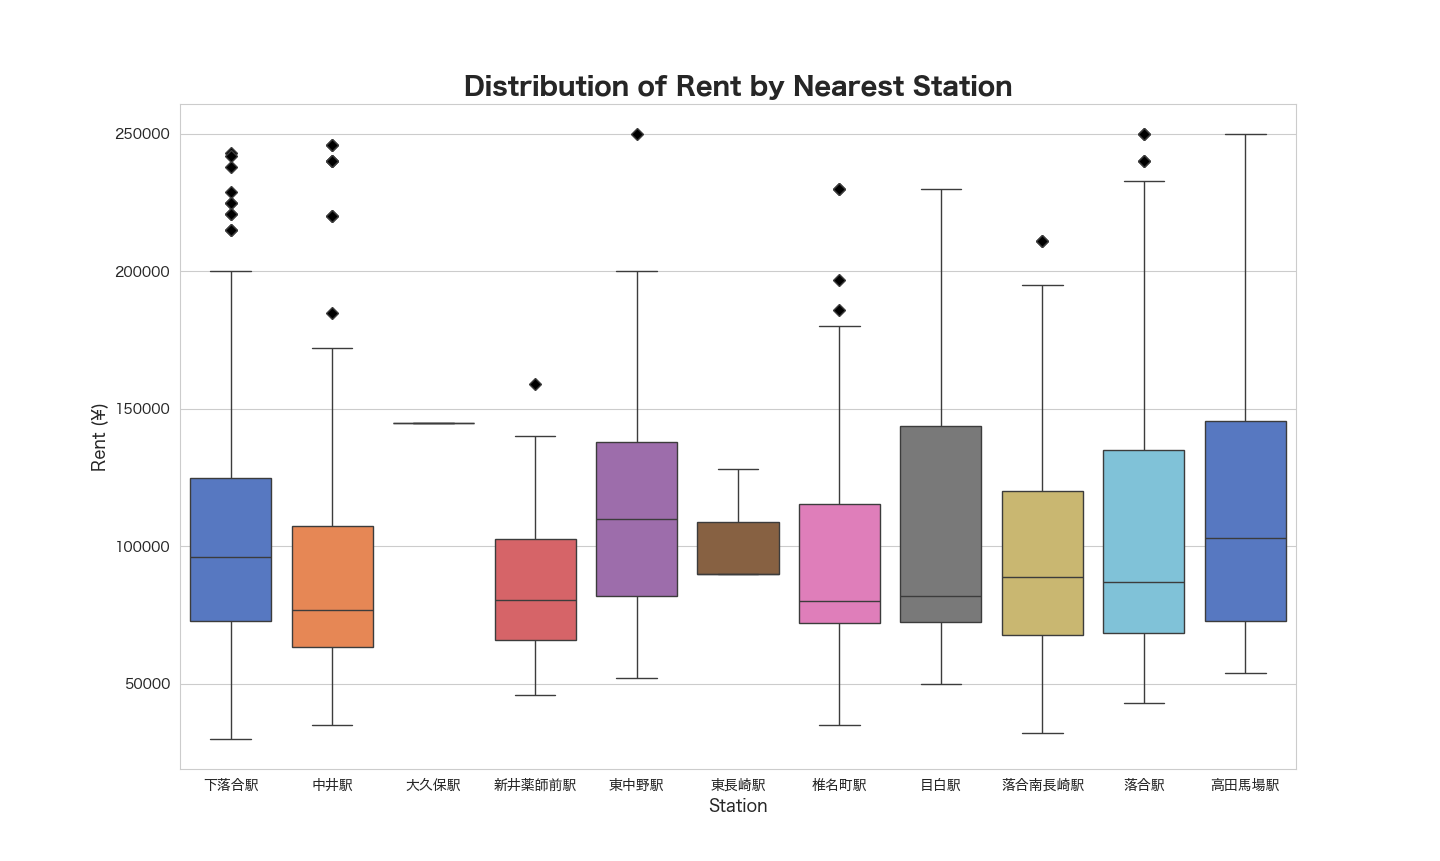

### Rent Variation with Building Size
> Like `distance_to_nearest_station`, `building_size` has a **limited number of discrete values**, making a **box plot** the most appropriate way to visualize its **relationship with** `rent`. The box plot **maintains the order of the integer values**, allowing us to see how `rent` distributions change as `building_size` increases.

In [ ]:
# Initialize figure
fig = plt.figure(figsize = (15, 8))

# Boxplot distribution of rent by building_size
sns.boxplot(
    data = tokyo_housing_df, x = 'building_size', y = 'rent', 
    palette = palette, flierprops = {'mfc' : 'black', 'marker': 'D'}
)

# Set title, axis labels
plt.title('Distribution of Rent by Building Size', fontsize = 18, fontweight = 'bold')
plt.xlabel('Building Size (# of Floors)', fontsize = 12)
plt.ylabel('Rent (¥)', fontsize = 12)

plt.savefig('building_size_box.png')

>**Distribution of Rent by Building Size**
>- The plot shows that `rent` **tends to increase with** `building_size`.
>- The relationship between `building_age` and `rent` appears nonlinear, **resembling a third-order polynomial**: initially rising, then flattening, and rising again.
>- For the **current analysis**, we will **assume linearity**, though fitting a third-order polynomial could be explored in future analyses.

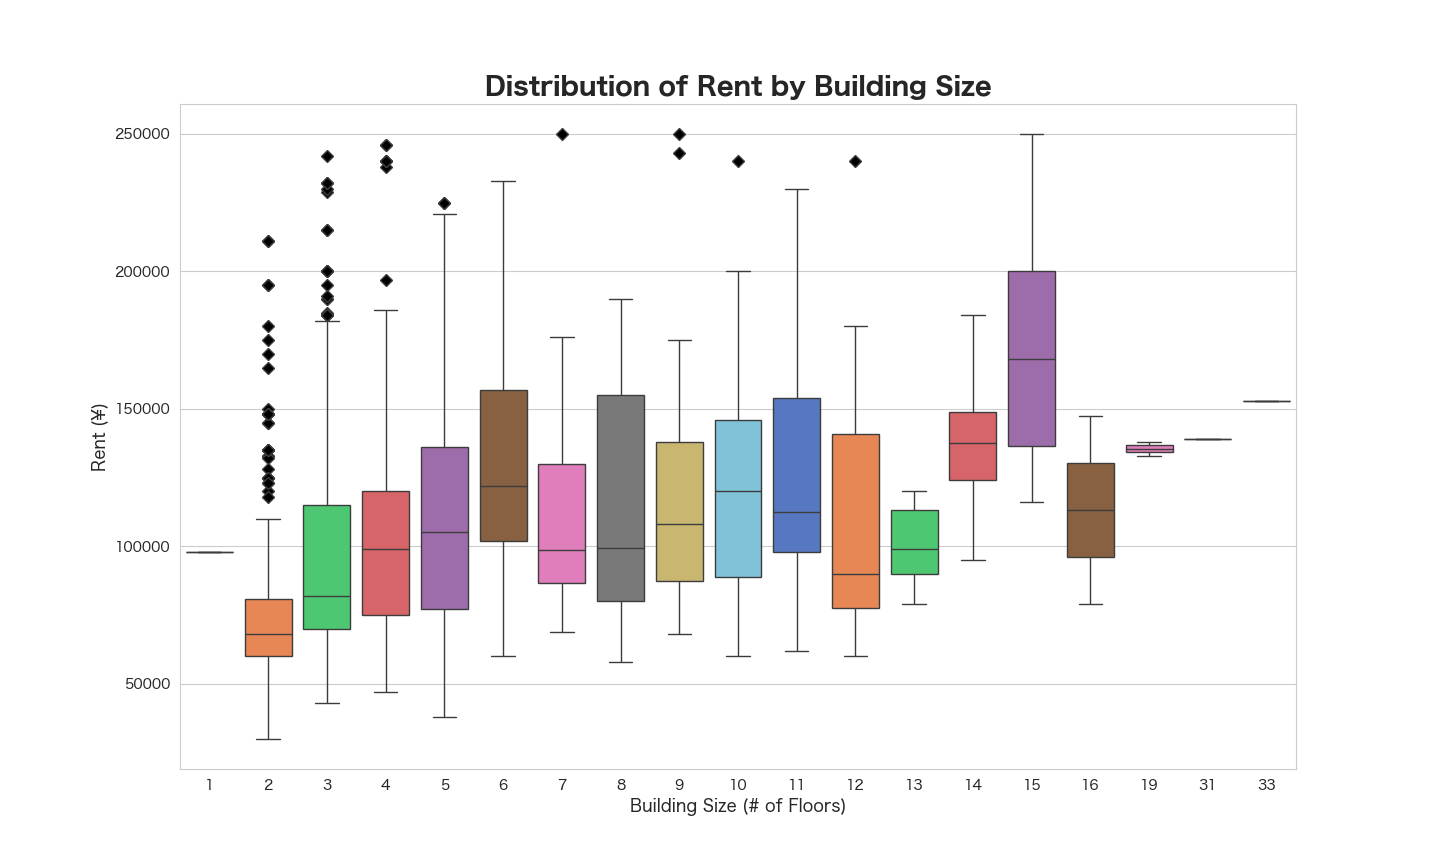

### Rent Variation Across Floor Levels
>Like `building_size`, `floor` is an **ordered quantitative variable** with only a **small set of discrete values**. For this reason, a **box plot** is the most effective way to visualize the **relationship between** `rent` **and** `floor`. It clearly highlights any patterns or shifts in the distribution of rental prices as floor levels increase. 

In [ ]:
# Initialize figure
fig = plt.figure(figsize = (15, 8))

# Boxplot distribution of rent by floor
sns.boxplot(
    data = tokyo_housing_df, x = 'floor', y = 'rent', 
    palette = palette, flierprops = {'mfc' : 'black', 'marker': 'D'}
)

# Set title, axis labels
plt.title('Distribution of Rent by Floor', fontsize = 18, fontweight = 'bold')
plt.xlabel('Floor', fontsize = 12)
plt.ylabel('Rent (¥)', fontsize = 12)

plt.savefig('floor_box.png')

>**Distribution of Rent by Floor**
>- The box plot indicates that `rent` **generally increases with** `floor`.
>- The relationship between `floor` and `rent` appears to be **mostly linear**.

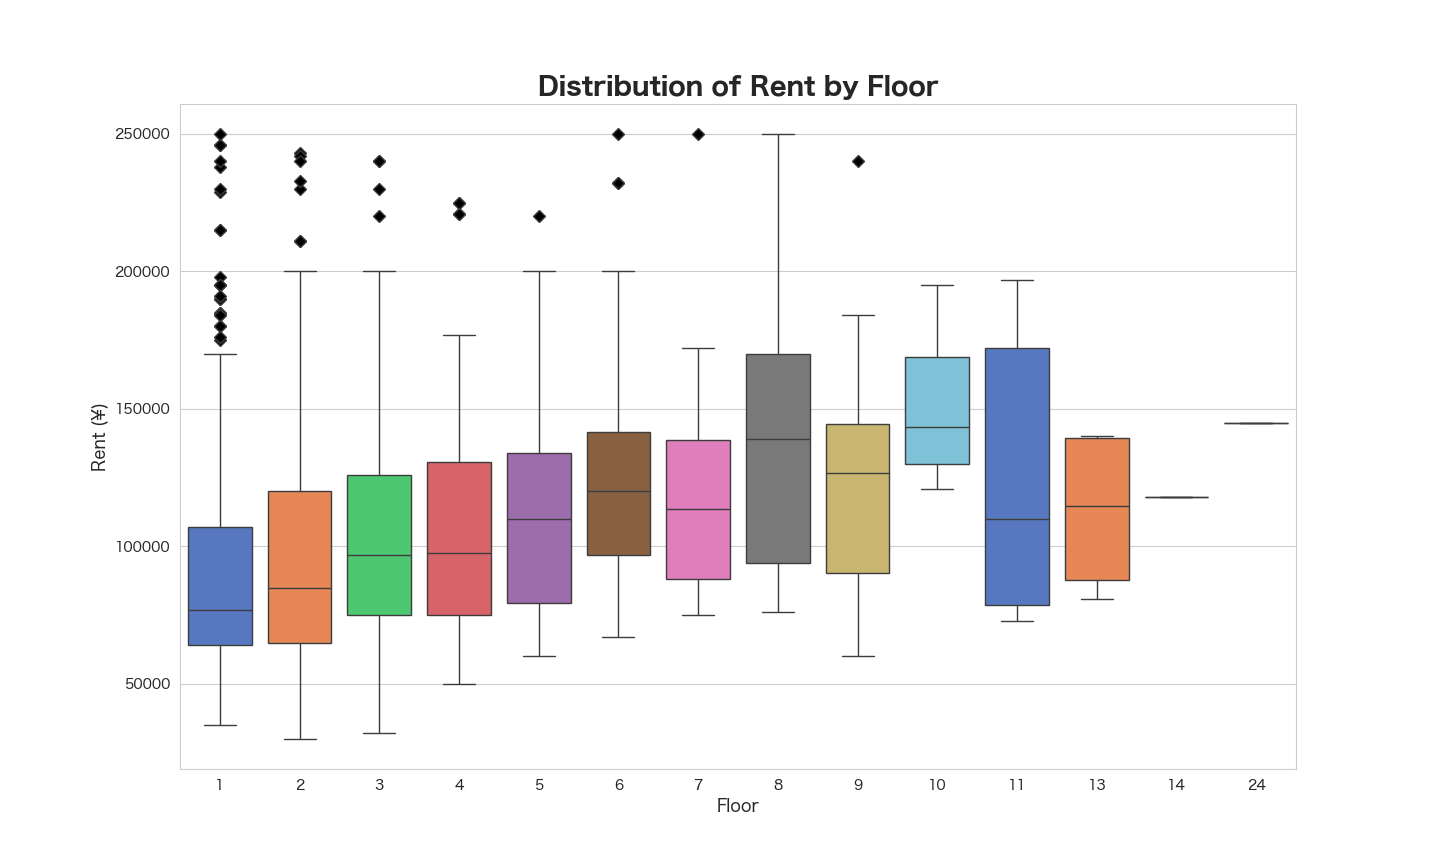